# Safety margins

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cartopy
import cartopy.crs as ccrs
import cmocean
import constants
import dask
import data_collections as dc
import funnel
import intake
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metabolic as mi
import numpy as np
import util
import xarray as xr

/glade/work/mclong/miniconda3/envs/metabolic/lib/python3.7/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


In [3]:
df = mi.open_traits_df(add_ATmax=False, pull_remote=True)
df

,Species,Phylum,alphaD_log10,Emet,Eo,Ao,Ac,Phi_crit
0,Acanthephyra acutifrons,Crustacea,0.479565,0.040200,-0.027836,0.264715,0.131959,2.006040
1,Acanthephyra curtirostris,Crustacea,0.377714,0.043938,0.038027,0.252578,0.141861,1.780456
2,Acanthephyra purpurea,Crustacea,1.035748,0.840722,0.131972,0.230068,0.073638,3.124330
3,Acanthephyra smithi,Crustacea,1.082577,0.313173,-0.030067,0.286307,0.174423,1.641453
4,Acipenser brevirostrum,Chordata,NaN,NaN,0.362569,0.218524,0.048415,4.513525
...,...,...,...,...,...,...,...,...
56,Styela plicata,Tunicata,0.433791,0.346635,-0.190998,0.061336,0.043505,1.409863
57,Systellaspis debilis,Crustacea,0.779626,0.418652,0.226970,0.219289,0.096003,2.284196
58,Tarletonbeania crenularis,Chordata,NaN,NaN,0.213307,0.203696,0.051780,3.933876
59,Tautogolabrus adspersus,Chordata,0.801974,0.327012,0.244520,0.170886,0.051204,3.337395


In [74]:
ds_CTmax = mi.open_CTmax_data()
k = np.where(ds_CTmax.lat != 0)[0]
ds_CTmax = ds_CTmax.isel(N=k)
ds_CTmax

<xarray.Dataset>
Dimensions:        (N: 97, percentile: 21)
Coordinates:
  * percentile     (percentile) uint8 0 5 10 15 20 25 30 ... 75 80 85 90 95 100
Dimensions without coordinates: N
Data variables:
    lat            (N) float64 21.03 27.93 60.65 55.18 ... -68.75 -60.79 34.1
    lat_dist       (N, percentile) float64 19.08 19.28 19.73 ... 50.0 63.66
    Thabitat_dist  (N, percentile) float64 19.45 20.41 22.86 ... 23.56 29.03
    CTmax          (N) float64 40.3 41.8 15.0 25.02 25.0 ... 32.7 10.0 9.0 29.0
    Species        (N) object 'Kuhlia sandvicensis' ... 'Phronima sedentaria'
    Phylum         (N) object 'Chordata' 'Chordata' ... 'Chordata' 'Arthropoda'

In [29]:
curator = util.curator_local_assets()
cat = curator.open_catalog()
ds_trait_space = cat['trait-space'].to_dask().load()
ds_trait_space

<xarray.Dataset>
Dimensions:            (Ac: 12, Eo: 11, Ao: 12)
Coordinates:
  * Ac                 (Ac) float64 0.03 0.037 0.0456 ... 0.1974 0.2433 0.3
  * Ao                 (Ao) float64 0.06811 0.08867 0.1147 ... 0.784 0.9872
  * Eo                 (Eo) float64 -0.5 -0.3056 -0.1111 ... 0.8611 1.056 1.25
Data variables:
    ATmax_active       (Ac, Eo) float64 nan nan nan nan ... 27.2 25.63 24.37
    ATmax_resting      (Ao, Eo) float64 42.49 35.22 29.01 ... 33.29 31.24 29.54
    Ac_cdf             (Ac) float64 0.01258 0.05662 0.1439 ... 0.9634 0.9818
    Ac_pdf             (Ac) float64 3.927 8.428 11.39 ... 0.996 0.4794 0.2129
    Ao_cdf             (Ao) float64 0.01258 0.05662 0.1439 ... 0.9634 0.9818
    Ao_pdf             (Ao) float64 1.361 2.824 3.714 ... 0.2847 0.1348 0.05895
    Eo_cdf             (Eo) float64 0.0009272 0.007643 0.0411 ... 0.9915 0.9989
    Eo_pdf             (Eo) float64 0.0111 0.07442 0.3113 ... 0.08196 0.01257
    trait_spc_active   (Ac, Eo) float64 0.0001004 0.0006727 ... 6.159e-06
    trait_spc_resting  (Ao, Eo) float64 0.0001098 0.0007361 ... 5.384e-06

In [30]:
ds_asm = cat['zonal-safety-margin-metrics-cesm1x1'].to_dask().load()
ds_asm

<xarray.Dataset>
Dimensions:                 (lat: 180, Tmax: 31)
Coordinates:
  * Tmax                    (Tmax) float64 1.0 3.0 5.0 7.0 ... 57.0 59.0 61.0
  * lat                     (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
Data variables:
    ASM_Tmax_active         (lat, Tmax) float64 nan nan nan nan ... nan nan nan
    ATmax_active            (lat, Tmax) float64 nan nan nan nan ... nan nan nan
    ATmax_resting           (lat, Tmax) float64 nan nan nan nan ... nan nan nan
    ATmax_resting_viaATmax  (lat, Tmax) float64 nan nan nan nan ... nan nan nan

In [31]:
ds_atmax = cat['zonal-safety-margin-metrics-woa2018'].to_dask().load()
ds_atmax

<xarray.Dataset>
Dimensions:        (lat: 180, Tmax: 31)
Coordinates:
  * Tmax           (Tmax) float64 1.0 3.0 5.0 7.0 9.0 ... 55.0 57.0 59.0 61.0
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    ATmax_active   (lat, Tmax) float64 0.0 0.0 0.0 0.0 ... 0.02938 0.0 0.0 0.0
    ATmax_resting  (lat, Tmax) float64 0.0 0.0 0.0 0.0 ... 0.63 0.5394 0.0 0.0

In [32]:
Ac_med = mi.trait_pdf(df, 'Ac', 30).median()
Ao_med = mi.trait_pdf(df, 'Ao', 30).median()
Eo_med = mi.trait_pdf(df, 'Eo', 30).median()


def plot_MI_illustration(ax):
    PO2_atm = constants.XiO2 * constants.kPa_per_atm
    T = np.arange(0, 32, 0.1)

    pO2_at_Phi_crit = mi.pO2_at_Phi_one(T, Ac_med, Eo_med * 2)
    pO2_at_Phi_one = mi.pO2_at_Phi_one(T, Ao_med, Eo_med * 2)

    ATmax_crit = mi.compute_ATmax(PO2_atm, Ac_med, Eo_med * 2)
    ATmax_one = mi.compute_ATmax(PO2_atm, Ao_med, Eo_med * 2)

    color_rest = 'tab:blue'
    color_active = 'tab:red'

    # active
    ax.plot(T, pO2_at_Phi_crit, '-', linewidth=2, color=color_active)
    ax.fill_between(
        T,
        pO2_at_Phi_crit,
        constants.XiO2 * constants.kPa_per_atm,
        where=pO2_at_Phi_crit <= PO2_atm,
        color='tab:green',
        alpha=0.5,
    )
    ax.plot(
        ATmax_crit,
        PO2_atm,
        'o',
        color=color_active,
    )
    ax.text(
        10,
        mi.pO2_at_Phi_one(10, Ac_med, Eo_med * 2) - 1.75,
        r'$\Phi = \Phi_{crit}$',
        color=color_active,
        fontsize=12,
        rotation=45,
    )

    # resting
    ax.plot(T, pO2_at_Phi_one, '-', linewidth=2, color=color_rest)
    ax.plot(
        ATmax_one,
        PO2_atm,
        'o',
        color=color_rest,
    )
    ax.text(
        22,
        mi.pO2_at_Phi_one(22, Ao_med, Eo_med * 2) - 1.75,
        r'$\Phi = 1$',
        color=color_rest,
        fontsize=12,
        rotation=45,
    )

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim([T.min(), T.max()])
    ax.set_xlabel('Temperature [°C]')
    ax.set_ylabel(r'$P_{\mathrm{O}_2}$ [kPa]')

    xlm = ax.get_xlim()
    ylm = (-2.6251270379913803, 73.89798889088694)  # ax.get_ylim()

    ax.set_ylim([ylm[0], PO2_atm + 0.05 * np.diff(ylm)])

    ax.axhline(PO2_atm, linewidth=1, color='k', linestyle='--', zorder=-100)
    ax.text(
        xlm[0] + 0.05 * np.diff(xlm), PO2_atm + 0.01 * np.diff(ylm), r'$P_{\mathrm{O}_2}^{atm}$'
    )

    ax.plot([ATmax_one, ATmax_one], [ylm[0], PO2_atm], '--', color=color_rest)
    ax.text(
        ATmax_one - 0.25,
        ylm[0] + 0.01 * np.diff(ylm),
        'Resting\nAT$_{max}$',
        ha='right',
        color=color_rest,
    )

    ax.plot([ATmax_crit, ATmax_crit], [ylm[0], PO2_atm], '--', color=color_active)
    ax.text(
        ATmax_crit - 0.25,
        ylm[0] + 0.01 * np.diff(ylm),
        'Active\nAT$_{max}$',
        ha='right',
        color=color_active,
    )

In [33]:
Phyla = list(df.Phylum.unique())
Phyla

['Crustacea', 'Chordata', 'Mollusca', 'Cnidaria', 'Tunicata']

In [34]:
Phyla = list(np.unique(ds_CTmax.Phylum))
Phyla

['Arthropoda',
 'Brachiopoda',
 'Bryozoa',
 'Chordata',
 'Echinodermata',
 'Mollusca',
 'NA']

In [42]:
def plot_trait_space(ax):
    ax.contourf(
        ds_trait_space.Eo,
        ds_trait_space.Ac,
        ds_trait_space.trait_spc_active,
        cmap=cmocean.cm.tempo,
        levels=50,  # np.arange(0.001, 1.02, 0.01),
    )
    xlm = ax.get_xlim()
    ylm = ax.get_ylim()

    markerorder = ["o", "v", "^", "<", ">", "s", "p", "P"]
    Phyla = list(df.Phylum.unique())
    for i, phylum in enumerate(Phyla):
        ndx = df.Phylum == phylum
        ax.plot(
            df.Eo.loc[ndx],
            df.Ac.loc[ndx],
            linestyle='none',
            marker=markerorder[i],
            color='k',
            markerfacecolor='none',
            label=phylum,
        )
    ax.set_xlabel(util.attrs_label(df.Eo.attrs))
    ax.set_ylabel(util.attrs_label(df.Ac.attrs))
    ax.legend(ncol=2)

    ax.set_xlim(xlm)
    ax.set_ylim(ylm)

In [43]:
def percentile(da, q, coord):
    """
    Compute the q-th percentile of the data along the specified coordinate.

    Returns the q-th percentile(s) of the array elements.

    Parameters
    ----------
    da : xarray.DataArray
        Input DataArray
    q : array_like of float
        Percentile or sequence of percentiles to compute, which must be between
        0 and 1 inclusive.
    coord : string
        Coordinate along which the percentiles are computed.
    """
    nj = da.sizes['lat']
    cdf = da.cumsum(dim=coord) / da.sum(coord)
    p = xr.DataArray(
        np.ones((len(q), nj)) * np.nan,
        dims=('p', 'lat'),
        coords={'lat': da.lat, 'p': q},
        name=da.name,
    )
    for i in range(len(q)):
        for j in range(nj):
            p[i, j] = np.interp(q[i], cdf.isel(lat=j), da[coord])
    return p


me = percentile(ds_asm.ATmax_resting, [0.25, 0.5, 0.75], 'Tmax')
them = np.nanpercentile(ds_asm.ATmax_resting, [25, 50, 75], axis=1)

/glade/work/mclong/miniconda3/envs/metabolic/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


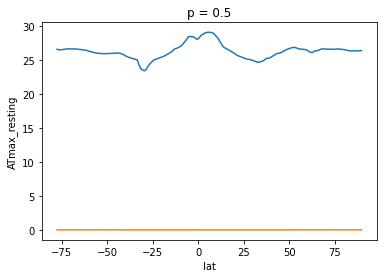

In [44]:
me.sel(p=0.5).plot()
plt.plot(ds_asm.lat, them[1, :])

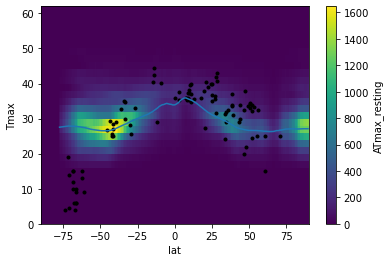

In [45]:
ds_atmax.ATmax_resting.T.plot()
k = np.where(ds_CTmax.lat != 0)[0]
plt.plot(ds_CTmax.lat[k], ds_CTmax.CTmax[k], 'k.')

pvals = percentile(ds_atmax.ATmax_resting, [0.25, 0.5, 0.75], coord='Tmax')
plt.plot(ds_atmax.lat, pvals.sel(p=0.5), '-', label=v)

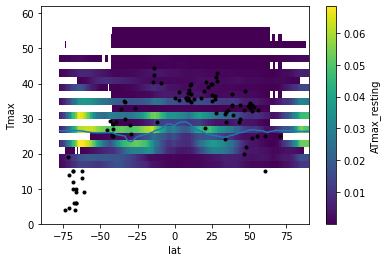

In [46]:
ds_asm.ATmax_resting.T.plot()
k = np.where(ds_CTmax.lat != 0)[0]
plt.plot(ds_CTmax.lat[k], ds_CTmax.CTmax[k], 'k.')

pvals = percentile(ds_asm.ATmax_resting, [0.25, 0.5, 0.75], coord='Tmax')
plt.plot(ds_asm.lat, pvals.sel(p=0.5), '-', label=v)

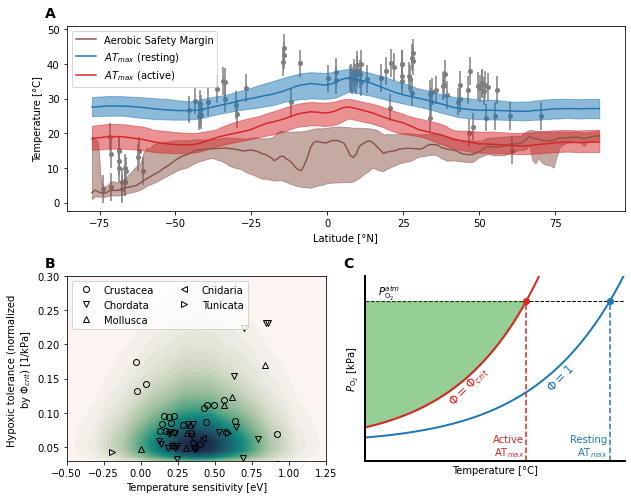

In [92]:
fig = plt.figure(figsize=(10, 8))

nrow, ncol = 2, 2
gs = gridspec.GridSpec(
    nrows=nrow,
    ncols=ncol,
    wspace=0.15,
    hspace=0.35,
)

axs = [
    plt.subplot(gs[0, :]),
    plt.subplot(gs[1, 0]),
    plt.subplot(gs[1, 1]),
]

colors = dict(
    ATmax_resting="tab:blue",
    ATmax_active="tab:red",
    ASM_Tmax_active="tab:brown",
)
labels = dict(
    ATmax_resting="$AT_{max}$ (resting)",
    ATmax_active="$AT_{max}$ (active)",
    ASM_Tmax_active="Aerobic Safety Margin",
)

ax = axs[0]
xerr = np.vstack(
    (
        ds_CTmax.lat - ds_CTmax.lat_dist.sel(percentile=35).values,
        ds_CTmax.lat_dist.sel(percentile=65).values - ds_CTmax.lat,
    )
)
ax.errorbar(
    ds_CTmax.lat,
    ds_CTmax.CTmax,
    # xerr=xerr,
    yerr=4,
    marker="o",
    color="tab:gray",
    linestyle='none',
    markersize=4,
    zorder=-1000,
)

Tmax_variables = ["ASM_Tmax_active"]

for v in Tmax_variables:
    pvals = percentile(ds_asm[v], [0.25, 0.5, 0.75], coord="Tmax")
    ax.plot(
        ds_asm.lat,
        pvals.sel(p=0.5),
        "-",
        label=labels[v],
        color=colors[v],
    )
    ax.fill_between(
        ds_asm.lat,
        pvals.sel(p=0.25),
        pvals.sel(p=0.75),
        color=colors[v],
        zorder=-100,
        alpha=0.5,
    )

Tmax_variables = [
    "ATmax_resting",
    "ATmax_active",
]
for v in Tmax_variables:
    pvals = percentile(ds_atmax[v], [0.25, 0.5, 0.75], coord="Tmax")
    ax.plot(
        ds_atmax.lat,
        pvals.sel(p=0.5),
        "-",
        label=labels[v],
        color=colors[v],
    )
    ax.fill_between(
        ds_atmax.lat,
        pvals.sel(p=0.25),
        pvals.sel(p=0.75),
        color=colors[v],
        zorder=-100,
        alpha=0.5,
    )


ax.set_ylabel("Temperature [°C]")
ax.set_xlabel(util.attrs_label(ds_asm.lat))

ax.legend()
# loc=(1.01, 0));

ax.set_ylabel("Temperature [°C]")
ax.set_xlabel("Latitude [°N]")

plot_trait_space(axs[1])
plot_MI_illustration(axs[2])

util.label_plots(fig, axs, xoff=-0.03, yoff=0.015)

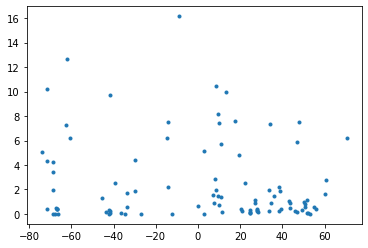

In [86]:
plt.plot(ds_CTmax.lat, xerr[1, :], '.')

In [78]:
-45 - -46

1

In [68]:
ds_CTmax.percentile

<xarray.DataArray 'percentile' (percentile: 21)>
array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100], dtype=uint8)
Coordinates:
  * percentile  (percentile) uint8 0 5 10 15 20 25 30 ... 70 75 80 85 90 95 100